In [176]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics 
pd.set_option('display.max_columns', None)


In [177]:
# read file as csv 
dataset = pd.read_csv('student-mat.csv', delimiter=';')
# show a first 5 rows from data
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [178]:
dataset = dataset.drop(['school', 'address'], axis=1)

In [179]:
# encoding data from categorical to numrical 
cols = ['schoolsup', 'famsup', 'paid', 'activities','nursery', 'higher', 'internet', 'romantic']

def encode_categ_data():
    encoder = LabelEncoder()
    for col in cols: 
        dataset[col] = encoder.fit_transform(dataset[col])
    


In [180]:
encode_categ_data()
dataset

,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,F,17,GT3,T,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,F,15,LE3,T,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,F,15,GT3,T,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,F,16,GT3,T,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,LE3,A,2,2,services,services,course,other,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,9,9
391,M,17,LE3,T,3,1,services,services,course,mother,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,14,16,16
392,M,21,GT3,T,1,1,other,other,course,other,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7
393,M,18,LE3,T,3,2,services,other,course,mother,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,10


In [181]:
dataset

,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,F,17,GT3,T,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,F,15,LE3,T,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,F,15,GT3,T,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,F,16,GT3,T,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,LE3,A,2,2,services,services,course,other,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,9,9
391,M,17,LE3,T,3,1,services,services,course,mother,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,14,16,16
392,M,21,GT3,T,1,1,other,other,course,other,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7
393,M,18,LE3,T,3,2,services,other,course,mother,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,10


In [182]:
def custom_combiner_sex_feature_name(feature, category):
    #  return str(feature) + "_" + type(category).__name__ + "_" + str(category)
    if category == 'F': category = 'Female' 
    else: category = 'Male'
    return str(feature)+"_"+str(category)

enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False, feature_name_combiner= custom_combiner_sex_feature_name).set_output(transform='pandas')
encoder_hot = enc.fit_transform(dataset[['sex']])
dataset = pd.concat([dataset, encoder_hot], axis=1).drop(columns=['sex'])


In [183]:
dataset.head()

,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sex_Female,sex_Male
0,18,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1.0,0.0
1,17,GT3,T,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1.0,0.0
2,15,LE3,T,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1.0,0.0
3,15,GT3,T,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,1.0,0.0
4,16,GT3,T,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,1.0,0.0


In [184]:
dataset.Pstatus.unique()

array(['A', 'T'], dtype=object)

In [185]:
dataset

,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sex_Female,sex_Male
0,18,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1.0,0.0
1,17,GT3,T,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1.0,0.0
2,15,LE3,T,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1.0,0.0
3,15,GT3,T,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,1.0,0.0
4,16,GT3,T,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,LE3,A,2,2,services,services,course,other,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,9,9,0.0,1.0
391,17,LE3,T,3,1,services,services,course,mother,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,14,16,16,0.0,1.0
392,21,GT3,T,1,1,other,other,course,other,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7,0.0,1.0
393,18,LE3,T,3,2,services,other,course,mother,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,10,0.0,1.0


In [186]:
# encoding feature from categorical data into numerical data 
def encoding_feature(dataset, cols):
    enc = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
    for col in cols: 
        encoder = enc.fit_transform(dataset[[col]])
        dataset = pd.concat([dataset, encoder], axis=1).drop(columns=[col])
    return dataset
    

dataset = encoding_feature(dataset, ['Mjob', 'Fjob', 'reason', 'guardian', 'famsize', 'Pstatus'])


In [187]:
# information about the data 
# will note the all Dtype of data whether int or float
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                395 non-null    int64  
 1   Medu               395 non-null    int64  
 2   Fedu               395 non-null    int64  
 3   traveltime         395 non-null    int64  
 4   studytime          395 non-null    int64  
 5   failures           395 non-null    int64  
 6   schoolsup          395 non-null    int64  
 7   famsup             395 non-null    int64  
 8   paid               395 non-null    int64  
 9   activities         395 non-null    int64  
 10  nursery            395 non-null    int64  
 11  higher             395 non-null    int64  
 12  internet           395 non-null    int64  
 13  romantic           395 non-null    int64  
 14  famrel             395 non-null    int64  
 15  freetime           395 non-null    int64  
 16  goout              395 non

In [188]:
dataset

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sex_Female,sex_Male,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T
0,18,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,17,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,15,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,15,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,16,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,9,9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
391,17,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,14,16,16,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
392,21,1,1,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
393,18,3,2,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,10,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [189]:

# split the dataset into two parts x (features) and y (target value) 

X = dataset.drop(columns=['G1', 'G2', 'G3'])
y = dataset.loc[:, ['G1', 'G2', 'G3'] ]

scalar = MinMaxScaler()
X = scalar.fit_transform(X)
# print shape of the first 5 rows X and y 
# print(X.head().shape)
# print(y.head().shape)



In [190]:
# splitting data into train and test for each value x and y 
X_train, X_test, y_train, y_test = train_test_split(X, y)


<Axes: xlabel='G1', ylabel='Count'>

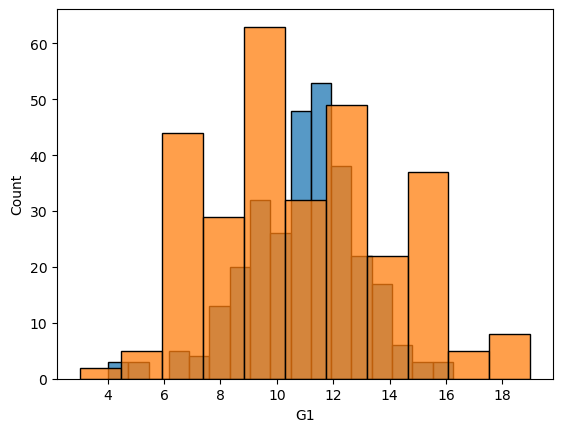

In [194]:
regr = MultiOutputRegressor(LinearRegression()).fit(X_train, y_train)
y_prediction = regr.predict(X_train)

# plotting disturbution for y_test and y_prediction
sns.histplot(y_prediction[:, 0])
sns.histplot(y_train['G1'])
# print(y_prediction[:, 0])
# print(y_test)


In [192]:
metrics.r2_score(y_train, y_prediction)

0.32411797330754305